In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv("raw_sales.csv")

In [20]:
df

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3
...,...,...,...,...,...
29575,2019-07-25 00:00:00,2900,500000,unit,3
29576,2019-07-25 00:00:00,2612,560000,unit,2
29577,2019-07-26 00:00:00,2912,464950,unit,2
29578,2019-07-26 00:00:00,2601,589000,unit,2


In [21]:
df.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [22]:
df.tail()

,datesold,postcode,price,propertyType,bedrooms
29575,2019-07-25 00:00:00,2900,500000,unit,3
29576,2019-07-25 00:00:00,2612,560000,unit,2
29577,2019-07-26 00:00:00,2912,464950,unit,2
29578,2019-07-26 00:00:00,2601,589000,unit,2
29579,2019-07-26 00:00:00,2612,775000,unit,2


In [23]:
df.describe()

,postcode,price,bedrooms
count,29580.000000,2.958000e+04,29580.000000
mean,2730.249730,6.097363e+05,3.250169
std,146.717292,2.817079e+05,0.951275
min,2600.000000,5.650000e+04,0.000000
25%,2607.000000,4.400000e+05,3.000000
50%,2615.000000,5.500000e+05,3.000000
75%,2905.000000,7.050000e+05,4.000000
max,2914.000000,8.000000e+06,5.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   price         29580 non-null  int64 
 3   propertyType  29580 non-null  object
 4   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [25]:
df.columns

Index(['datesold', 'postcode', 'price', 'propertyType', 'bedrooms'], dtype='object')

In [28]:
df['datesold']= pd.to_datetime(df['datesold'])

In [29]:
df

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,house,4
1,2007-02-27,2906,290000,house,3
2,2007-03-07,2905,328000,house,3
3,2007-03-09,2905,380000,house,4
4,2007-03-21,2906,310000,house,3
...,...,...,...,...,...
29575,2019-07-25,2900,500000,unit,3
29576,2019-07-25,2612,560000,unit,2
29577,2019-07-26,2912,464950,unit,2
29578,2019-07-26,2601,589000,unit,2


In [35]:
# Assuming 'Date' column contains the date information
df['datesold'] = pd.to_datetime(df['datesold']) # Convert 'Date' to datetime
filtered_df = df[df['datesold'].dt.year == 2014]  # Replace 2014 with your desired year
print(filtered_df)

        datesold  postcode   price propertyType  bedrooms
8223  2014-01-06      2615  406000        house         3
8224  2014-01-06      2906  537000        house         4
8225  2014-01-07      2615  382000        house         3
8226  2014-01-07      2905  443200        house         3
8227  2014-01-07      2614  515000        house         4
...          ...       ...     ...          ...       ...
26057 2014-12-22      2612  483000         unit         2
26058 2014-12-22      2905  620000         unit         4
26059 2014-12-23      2913  319000         unit         2
26060 2014-12-23      2612  422500         unit         2
26061 2014-12-24      2614  374500         unit         3

[2863 rows x 5 columns]


In [39]:
df.index

RangeIndex(start=0, stop=29580, step=1)

In [42]:
df.groupby(df['datesold'].dt.year)['price'].mean()

datesold
2007    522377.210884
2008    493814.162754
2009    496092.032959
2010    559564.810289
2011    566715.110227
2012    552501.369214
2013    553416.296838
2014    592653.761439
2015    626101.342654
2016    635185.311668
2017    671880.551420
2018    660701.042768
2019    634184.218773
Name: price, dtype: float64

In [43]:
df.groupby(df['datesold'].dt.year)['price'].count()

datesold
2007     147
2008     639
2009    1426
2010    1555
2011    1633
2012    1858
2013    2119
2014    2863
2015    3648
2016    3908
2017    4541
2018    3858
2019    1385
Name: price, dtype: int64

In [45]:
start_date = '2010-01-01'
end_date = '2015-12-31'
date_range_df = df[(df['datesold'] >= start_date) & (df['datesold'] <= end_date)]
print(date_range_df)

        datesold  postcode    price propertyType  bedrooms
1957  2010-01-04      2615   435000        house         3
1958  2010-01-05      2904   712000        house         4
1959  2010-01-06      2617   435000        house         4
1960  2010-01-06      2606  1350000        house         5
1961  2010-01-07      2905   612500        house         4
...          ...       ...      ...          ...       ...
26612 2015-12-23      2603   415000         unit         2
26613 2015-12-23      2612   438000         unit         2
26614 2015-12-23      2612   450000         unit         2
26615 2015-12-23      2605   515000         unit         2
26616 2015-12-24      2900   365000         unit         2

[13676 rows x 5 columns]


In [46]:
df.groupby(df['datesold'].dt.month)['price'].mean()

datesold
1     556812.934816
2     604714.174322
3     624162.017373
4     615371.905186
5     613112.762603
6     602028.727067
7     588337.742666
8     584237.228489
9     611577.791719
10    611372.174647
11    647936.112186
12    618168.901316
Name: price, dtype: float64

(array([8.4120e+03, 1.7543e+04, 2.7160e+03, 6.3400e+02, 1.5900e+02,
        6.4000e+01, 2.4000e+01, 1.1000e+01, 5.0000e+00, 2.0000e+00,
        3.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  56500.,  453675.,  850850., 1248025., 1645200., 2042375.,
        2439550., 2836725., 3233900., 3631075., 4028250., 4425425.,
        4822600., 5219775., 5616950., 6014125., 6411300., 6808475.,
        7205650., 7602825., 8000000.]),
 <BarContainer object of 20 artists>)

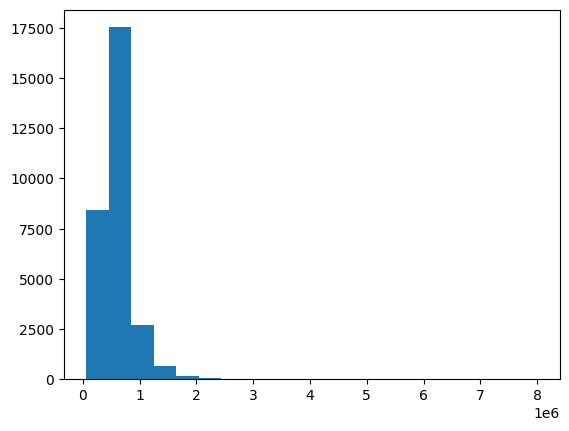

In [50]:
plt.hist(df['price'],bins=20)